In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
location_dict = {'a': "C:\\Users\\heine\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",'c':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
# import scipy.stats as stats
import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
from ete3 import Tree


what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\Anaconda3\\python36.zip', 'C:\\Users\\heine\\Anaconda3\\DLLs', 'C:\\Users\\heine\\Anaconda3\\lib', 'C:\\Users\\heine\\Anaconda3', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\heine\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
data process

## Datasets to load

In [3]:
#Load KL SC PKA data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)


#Total number of KL genes that have a paralog in SCER
# kl_sc_PKA_data_paralogs = kl_sc_PKA_data[kl_sc_PKA_data["N SCer Orthologs"]==2]

# print('Total number of KL genes that map to a set of paralogs in S.Cer: ' + str(int(len(kl_sc_PKA_data_paralogs)/2)))

# #Total of these that are WGD paralogs
# ohnolog_set = set(ohnologs['Gene 1']) | set(ohnologs['Gene 2'])

# non_ohnologs = set(kl_sc_PKA_data_paralogs['sc_genename']) - ohnolog_set
# ohnologs_klac_orth = set(kl_sc_PKA_data_paralogs['sc_genename']) & ohnolog_set

# print('KL genes that map to a set of Ohnologs: ' + str(int(len(ohnologs_klac_orth)/2)) + '\n' +
#      'KL genes that map to a non Ohnolog paralog: ' + str(int(len(non_ohnologs))))


In [2]:
#Load Ohnolog data
ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath('20170817_klscpka/20170817_ohnologs_sorted.csv'),index_col = 0)
ohnologs_expression_sorted

,Number,Ancestor,AA %id,Length Ratio,SC_common_name_YGOB_low,N SCer Orthologs_low,kl_genename_low,sc_genename_low,baseMean_KL_low,log2FoldChange_KL_low,...,rlog_AS_yesNMPP1_YPD_t40_mean_SC_high,rlog_AS_noNMPP1_YPD_t40_var_SC_high,rlog_AS_yesNMPP1_YPD_t40_var_SC_high,raw_AS_noNMPP1_YPD_t40_mean_SC_high,raw_AS_yesNMPP1_YPD_t40_mean_SC_high,raw_AS_noNMPP1_YPD_t40_var_SC_high,raw_AS_yesNMPP1_YPD_t40_var_SC_high,SC_common_name_high,threshold_group_SC,threshold_group_KL
0,1,Anc_1.15,25%,0.73,HLR1,2,KLLA0C00803g,YDR528W,143.996092,-0.749493,...,6.275642,0.116566,0.228536,1.661288,2.082978,0.006715,0.034314,LRE1,down_flat,flat
1,2,Anc_1.17,60%,0.99,APA1,2,KLLA0C00847g,YCL050C,1414.642378,0.725481,...,6.096006,0.099664,0.151030,1.403782,2.040858,0.013446,0.017233,APA2,flat_flat,flat
2,3,Anc_1.22,48%,0.84,YDR524C-B,2,KLLA0C00957g,YDR524C-B,3012.323698,-0.149862,...,7.674560,0.031475,4.004451,0.531831,2.594901,0.012351,0.485654,YCL048W-A,up_flat,flat
3,4,Anc_1.25,42%,0.92,SPS2,2,KLLA0C01001g,YDR522C,37.344315,2.658001,...,4.420701,0.150483,0.010621,0.798944,1.562308,0.019858,0.002470,SPS22,flat_flat,up
4,5,Anc_1.31,39%,0.99,EUG1,2,KLLA0C01111g,YDR518W,5552.681922,1.039729,...,11.212459,0.043240,0.001330,3.375287,3.513382,0.001723,0.000384,PDI1,flat_flat,flat
5,6,Anc_1.33,73%,1.00,EMI2,2,KLLA0C01155g,YDR516C,1665.368014,2.178913,...,10.020884,1.698033,2.069170,1.791886,3.224448,0.221163,0.269873,GLK1,up_flat,flat
6,7,Anc_1.36,25%,0.97,SRO9,2,KLLA0C01210g,YCL037C,205.559810,-4.762072,...,4.996927,0.004003,0.054774,1.440944,1.674896,0.000485,0.008530,SLF1,down_flat,down
7,8,Anc_1.37,37%,0.85,GFD2,2,KLLA0C01254g,YCL036W,200.750330,-0.748394,...,5.521014,0.137600,0.114629,2.253541,1.749123,0.008742,0.019621,YDR514C,down_flat,flat
8,9,Anc_1.38,62%,0.77,GRX1,2,KLLA0C01298g,YCL035C,3375.669184,1.719177,...,9.220533,1.104274,1.132657,1.923534,2.988741,0.128166,0.150249,GRX2,up_up,flat
9,10,Anc_1.50,67%,0.95,GNP1,2,KLLA0C01606g,YDR508C,674.824086,-2.184941,...,9.856238,0.023828,0.032432,2.657831,3.012486,0.010313,0.002548,AGP1,flat_flat,flat


In [89]:
# Load goi data from goi data file created in paralog analysis script. 
goi_data = pd.read_csv(data_processing_dir + os.sep + "20170817_klscpka" + os.sep + "goi_data.csv")

#subset ohnologs_sorted to include only goi_data

ohnologs_goi = ohnologs_expression_sorted[ohnologs_expression_sorted['sc_genename_low'].isin(goi_data['sc_genename']) |
                                          ohnologs_expression_sorted['sc_genename_high'].isin(goi_data['sc_genename'])]

ortholog_dataset_goi = ohnologs_goi.loc[:,['sc_genename_low','sc_genename_high']]
ortholog_dataset_goi.columns = ['low', 'high']
ortholog_dataset_goi

# ## Should redo this to incorporate latest goi info
# ohnologs_goi = pd.read_csv(data_processing_dir + os.path.normpath('20170817_klscpka/20170817_ohnologs_goi.csv'),index_col = 0)
# ohnologs_goi

,low,high
0,YDR528W,YCL051W
3,YDR522C,YCL048W
4,YDR518W,YCL043C
5,YDR516C,YCL040W
6,YCL037C,YDR515W
9,YDR508C,YCL025C
11,YDR505C,YLR177W
12,YLR180W,YDR502C
18,YJL198W,YCR037C
19,YCR034W,YJL196C


In [4]:
#Phylomedb convert and trees

sc_phylomedb_convert = pd.read_table(data_processing_dir + os.path.normpath("phylogenetic_trees/sc_id_conversion.txt"), header=None)
sc_phylomedb_convert.columns = ["phylomedb_name","sc_genename"]

trees = pd.read_table(data_processing_dir + os.path.normpath("phylogenetic_trees/best_trees.txt"), header = None)
trees.columns = ["phylomedb_name","alignment_method","score","tree"]
trees = pd.merge(trees, sc_phylomedb_convert, on = "phylomedb_name", how = 'left')
trees.set_index("phylomedb_name", inplace=True)


In [60]:
trees_reduced = pd.read_table(data_processing_dir + os.path.normpath("phylogenetic_trees/reduced_phylomes/Trees_STK.txt"), header = None)


,0,1
0,P43545_YEAST,"(O14027_SCHPO:0.108174,(((Wican1_30969_HANAN:0..."
1,P53730_YEAST,"(Q9USD4_SCHPO:1.16015,(YALI0C02475g_YARLI:1.05..."
2,P53285_YEAST,"(YALI0E06083g_YARLI:0.485661,(((Dekbr1_21723_D..."
3,P26263_YEAST,"(P36620_SCHPO:0.226098,((YALI0C00253g_YARLI:0...."
4,P53879_YEAST,"(Q01112_SCHPO:0.0533211,(YALI0B15752g_YARLI:0...."
5,P40459_YEAST,"(Q09673_SCHPO:1.32444,(((Dekbr1_48826_DEKBR:1...."
6,P25635_YEAST,"(Q9C1X1_SCHPO:0.282875,(((((Wican1_51974_HANAN..."
7,P23641_YEAST,"(Q9P7V8_SCHPO:0.255146,(Dekbr1_19034_DEKBR:0.5..."
8,P32906_YEAST,"(Q9P7C3_SCHPO:0.629631,(((Dekbr1_50624_DEKBR:0..."
9,P38065_YEAST,"(Q9UU81_SCHPO:0.399787,(((Wican1_84870_HANAN:0..."


In [29]:
#load GOIs here

## Build phylo ID conversion dataset

In [ ]:
#Make Dictionary for SC genes out of all_id_conversion.txt file
#Only need to do once
io_library.build_phylo_conversion_sc()

## Lookup functions

In [6]:
#check SC genename for given phylome name
gois = ['Phy000CZF5_YEAST', 'Phy000CX7L_YEAST', 'Phy000CZ7U_YEAST']
io_library.SC_common_name_lookup(list(sc_phylomedb_convert[sc_phylomedb_convert["phylomedb_name"].isin(gois)]['sc_genename']))

['SNZ1', 'SNZ2', 'SNZ3']

In [13]:
columns_to_view = ['SC_common_name_low','sc_genename_low', 'SC_common_name_high','sc_genename_high','log2FoldChange_SC_low', 'log2FoldChange_SC_high', 'log2FoldChange_KL_low','topologies_low','topologies_high','threshold_group_KL','threshold_group_SC']
sc_genename = ['YGR256W','YGR254W','YGR243W','YGR241C','YGR239C','YGR238C','YGR221C']
ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(sc_genename)) | (ohnologs_expression_sorted['sc_genename_high'].isin(sc_genename)) ].loc[:,columns_to_view]


,SC_common_name_low,sc_genename_low,SC_common_name_high,sc_genename_high,log2FoldChange_SC_low,log2FoldChange_SC_high,log2FoldChange_KL_low,topologies_low,topologies_high,threshold_group_KL,threshold_group_SC
258,GND1,YHR183W,GND2,YGR256W,-1.190240,7.143522,0.394234,NaN,NaN,flat,up_flat
259,ENO2,YHR174W,ENO1,YGR254W,-0.975982,2.299404,0.559521,NaN,NaN,flat,flat_flat
261,MPC2,YHR162W,MPC3,YGR243W,-1.860001,3.387496,-1.789380,NaN,NaN,flat,up_flat
262,YAP1802,YGR241C,YAP1801,YHR161C,0.062758,1.387725,1.183318,NaN,NaN,flat,flat_flat
263,PEX21,YGR239C,PEX18,YHR160C,-1.553162,5.889129,-1.657966,NaN,NaN,flat,up_flat
264,KEL2,YGR238C,KEL1,YHR158C,0.050599,0.312086,-0.763434,NaN,NaN,flat,flat_flat
266,SKG6,YHR149C,TOS2,YGR221C,-2.719425,-2.151725,-2.633315,NaN,NaN,down,down_flat


In [142]:
gois = ['COX5A','COX5B']
print(io_library.SC_orf_lookup_by_name(gois))
trees[trees['sc_genename'].isin(io_library.SC_orf_lookup_by_name(gois))]

['YNL052W', 'YIL111W']


,alignment_method,score,tree,sc_genename
phylomedb_name,,,,
Phy000CZNA_YEAST,LG,-6294.29,"(((((((((((Phy003LVZ0_51914:0.345273,Phy003M1S...",YNL052W
Phy000CWSS_YEAST,LG,-5039.33,"((((((((((Phy004FHA6_KAZAF:0.374036,((((Phy000...",YIL111W


In [144]:
#view tree for a given sc common name
#gois = ['ERV15','ERV14','AKR2','AKR1','YML018C','THI74','KDX1','SLT2','AAP1','APE2','MPC2','MPC3']
goi = ['COX5B']
tree = Tree(trees[trees['sc_genename']==io_library.SC_orf_lookup_by_name(goi)[0]]['tree'].values[0])
print(tree)

#prune down to seed and outgroup species
KLE_branch_seed = "KLULA"
ZT_branch_seed = "TORDC"
WGH_branch_seed = "YEAST" #options are "YEAST", "SACCA"
outgroups = ["CANAL","YARLI", "SCHPO"]   

leaf_names = tree.get_leaf_names()

# #Make a count of proteins from each species. 
# leaf_subset = [name for name in leaf_names if name.split('_')[1] in {WGH_branch_seed,KLE_branch_seed,ZT_branch_seed}]
# leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
# leaf_subset_spec_counter = Counter(leaf_subset_spec)

#Prune down tree to include only spec of interest and outgroups
leaf_subset_with_outgroups = [name for name in leaf_names if name.split('_')[1] in set([WGH_branch_seed,KLE_branch_seed,ZT_branch_seed] + outgroups)]
tree.prune(leaf_subset_with_outgroups) 
print(tree)

#Tree(trees[trees['sc_genename']==io_library.SC_orf_lookup_by_name(goi)[0]]['tree'])
#tree = Tree(trees.loc['Phy000CWKY_YEAST','tree'])


                              /-Phy004FHA6_KAZAF
                             |
                             |            /-Phy000NRSG_SACCA
                             |         /-|
                             |        |   \-Phy004F5JS_588726
                             |        |
                           /-|      /-|      /-Phy0023YX3_SACKL
                          |  |     |  |   /-|
                          |  |     |  |  |  |   /-Phy0000EKH_ASHGO
                          |  |     |   \-|   \-|
                          |  |   /-|     |      \-Phy0008MYC_KLULA
                          |  |  |  |     |
                          |  |  |  |      \-Phy002435W_LACTH
                        /-|   \-|  |
                       |  |     |   \-Phy004FVIW_TORDC
                       |  |     |
                       |  |     |   /-Phy000CZNA_YEAST
                       |  |      \-|
                     /-|  |         \-Phy000NPER_SACBA
                    |  |  |
               

['SNZ1', 'SNZ2', 'SNZ3'] - these genes have multiple orthologs in SC

In [ ]:
#phylome_db_name from sc genename
phylome_db_name = sc_phylomedb_convert[sc_phylomedb_convert['sc_genename']==gene]['sc_genename'].values[0]

## Single phylogenies for various combinations of seed species. 

In [ ]:
# Currently doesn't support different WGH seeds. 
#To use different WGH seed, we need to assign a related gene from the seed species for each S.Cer based tree, 
#and stop if that doesn't exist. 
#Run on the GPU cluster if you are doing a lot of branch seeds. 

## Should make the missing columns more specific. 

trees['topologies_{}_{}_{}'.format(WGH_branch_seed,KLE_branch_seed,ZT_branch_seed)] = topologies

KLE_branch_seeds = ["KLULA", "ASHGO", "LACTH","SACKL", "KLUWA"]  
ZT_branch_seeds = ["TORDC","ZYGRO"] 
#WGH_branch_seeds = ["YEAST","SACCA", "VANPO"]       
WGH_branch_seed = "YEAST"
#51660: N. Bacillosporus, 51914: C. CAstelii, K.Nag: 588726, N. Dairenensis: NAUDC, 
#1071379: Tet Blatt, TETPH: Tet. Phaffii, KAZAF: K. Africana, CANGA: Candida glabrata, SACBA
outgroups = ["CANAL","YARLI","DEKBR"]

for KLE_branch_seed in KLE_branch_seeds: 
    for ZT_branch_seed in ZT_branch_seeds:       
        print(" ".join([KLE_branch_seed, ZT_branch_seed, WGH_branch_seed]))
        topologies = io_library.assign_topologies(trees, WGH_branch_seed, KLE_branch_seed, ZT_branch_seed, outgroups)
        trees['topologies_{}_{}_{}'.format(WGH_branch_seed,KLE_branch_seed,ZT_branch_seed)] = topologies


trees.to_csv(data_processing_dir + os.path.normpath("phylogenetic_trees/trees_topologies.csv"))    


In [3]:
#Load tree_topology data
trees_topology = pd.read_csv(data_processing_dir + os.path.normpath('phylogenetic_trees/trees_topologies.csv'),index_col = 0)

In [7]:
topology_columns = [column for column in trees_topology.columns if column.split('_')[0]=='topologies']
a = Counter(trees_topology[topology_columns[0]])


5402

In [10]:
topology_column = topology_columns[0]

topology_counter = Counter(trees_topology[topology_column])

print(topology_counter)

#topologies1 = ['A', 'B', 'C', 'under_construction']



# 'missing KLULA protein'
# 'missing TORDC and KLULA protein'
# 'missing TORDC protein'

Counter({'A': 2714, 'C': 1216, 'missing KLULA protein': 479, 'missing TORDC and KLULA protein': 412, 'B': 251, 'under construction': 226, 'missing TORDC protein': 103, 'D': 1})


[479, 103, 412]

In [18]:
#Barplot of topology percentages for different seeds. 

topologies1 = ['A', 'B', 'C', 'under construction','D']
topologies2 = ['missing KLE protein', 'missing ZT protein', 'missing ZT and KLE protein']
topologies = topologies1 + topologies2

topology_columns = [column for column in trees_topology.columns if column.split('_')[0]=='topologies']

traces = [] 

for topology_column in topology_columns: 
    
    topology_counter = Counter(trees_topology[topology_column])
    
    topology_counts1 = [topology_counter[topology] for topology in topologies1]
    
    KLE_branch_seed = topology_column.split('_')[2]
    ZT_branch_seed = topology_column.split('_')[3]

    topologies2_dict = {'missing KLE protein': 'missing ' + KLE_branch_seed + ' protein', 
                        'missing ZT protein': 'missing ' + ZT_branch_seed + ' protein', 
                        'missing ZT and KLE protein' : 'missing ' + ZT_branch_seed + ' and ' + KLE_branch_seed + ' protein'}

    topology_counts2 = []
    for topology in topologies2:
        topology_counts2.append(topology_counter[topologies2_dict[topology]])

    topology_counts = topology_counts1 + topology_counts2
    total_counts = sum(topology_counts)
    if total_counts != sum(topology_counter.values()):
        print('Alert -- count mismatch!!!!')
        print(topology_counter)
        print(topology_counts)
    
    topology_pct = np.array(topology_counts)/total_counts
    
    trace = pygo.Bar(
        x= topologies,
        y= topology_pct,
        text= topology_counts,
        textposition = 'auto', 
        name = KLE_branch_seed + ' / ' + ZT_branch_seed 
#         marker=dict(
#             color='rgb(158,202,225)',
#             line=dict(
#                 color='rgb(8,48,107)',
#                 width=1.5),
#             ),
#         opacity=0.6
    )
    
    traces.append(trace)


py.iplot(traces, filename='topologies_single_gene')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~heineike02_student/0 or inside your plot.ly account where it is named 'topologies_single_gene'


In [56]:
#Visualize with a heatmap

ohnologs_topology_sorted = ohnologs_topology.sort_values(by = ['threshold_group_SC','log2FoldChange_KL_low'])

#fold change values
fc_values = ohnologs_topology_sorted.loc[:,['log2FoldChange_SC_low', 'log2FoldChange_SC_high', 'log2FoldChange_KL_low']]


#Topology values
WGH_branch_seed = 'YEAST'

topology_values = []
topology_column_labels = []

for fc_group in ['low', 'high']:
    for topology_column in topology_columns: 
        print(fc_group + " " + topology_column)
        KLE_branch_seed = topology_column.split('_')[2]
        ZT_branch_seed = topology_column.split('_')[3]
        value_dict = {'A':-5, 'B':5,'C':0,
                      'under construction':3,
                      'missing ' + KLE_branch_seed + ' protein':-1,
                      'missing ' + ZT_branch_seed + ' and ' + KLE_branch_seed +' protein':-2,
                      'missing ' + ZT_branch_seed + ' protein':-1.5,
                       np.nan:-2.5
                     }
        topology_values.append([value_dict[topology] for topology in ohnologs_topology_sorted[topology_column + '_' + fc_group]])
        
        topology_column_labels = WGH_branch_seed[0] + KLE_branch_seed[0] + ZT_branch_seed[0] + '_' + fc_group


gene_labels = ohnologs_topology_sorted['SC_common_name_low']+ ' / ' + ohnologs_topology_sorted['SC_common_name_high']

trace1 = pygo.Heatmap(z = np.array(fc_values),
                   x=['SC low FC', 'SC high FC', 'KL FC'],
                   y= gene_labels)
trace2 = pygo.Heatmap(z = np.array(topology_values).transpose(),
                   x=topology_column_labels,
                   y= gene_labels)


fig = pytools.make_subplots(rows=1, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

#fig['layout'].update(height=600, width=600, title='i <3 subplots')

# layout = pygo.Layout(
#     yaxis = {'title': 'Low Paralog / High Paralog'}
# )

#fig = pygo.Figure(data=data, layout=layout)
py.iplot(fig, filename='topology_heatmap')




low topologies_YEAST_KLULA_TORDC
low topologies_YEAST_KLULA_ZYGRO
low topologies_YEAST_ASHGO_TORDC
low topologies_YEAST_ASHGO_ZYGRO
low topologies_YEAST_LACTH_TORDC
low topologies_YEAST_LACTH_ZYGRO
low topologies_YEAST_SACKL_TORDC
low topologies_YEAST_SACKL_ZYGRO
low topologies_YEAST_KLUWA_TORDC
low topologies_YEAST_KLUWA_ZYGRO
high topologies_YEAST_KLULA_TORDC
high topologies_YEAST_KLULA_ZYGRO
high topologies_YEAST_ASHGO_TORDC
high topologies_YEAST_ASHGO_ZYGRO
high topologies_YEAST_LACTH_TORDC
high topologies_YEAST_LACTH_ZYGRO
high topologies_YEAST_SACKL_TORDC
high topologies_YEAST_SACKL_ZYGRO
high topologies_YEAST_KLUWA_TORDC
high topologies_YEAST_KLUWA_ZYGRO
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Ortholog Pair Topology

In [90]:
#For ortholog pairs, find topology 

ortholog_dataset = ortholog_dataset_goi

#all orthologs
#ortholog_dataset = ohnologs_expression_sorted.loc[:,['sc_genename_low','sc_genename_high']].rename(columns = {'sc_genename_low': 'low','sc_genename_high': 'high'})

#ohnologs_expression_sorted.iloc[0:30,:]
#ohnologs_expression_sorted[ohnologs_expression_sorted['SC_common_name_low'].isin(goi_sc_names)]  

#Input a series which has two columns - one for each paralog.  The labels distinguish the two paralogs. 

KLE_branch_seed = "KLULA"
ZT_branch_seed = "TORDC"
WGH_branch_seed = "YEAST" #options are "YEAST", "SACCA"
outgroups = ["CANAL","YARLI", "SCHPO"]    
verbose = False

#Input: 
#trees:  Dictionary which is indexed on phylome db name and hass the tree, sc_genename, alignment_method, and score

##
#sc_phylomedb_convert:  Should load this with the function. 

## Begin function

#Load sc_phylomedb_convert data
sc_phylomedb_convert = pd.read_table(data_processing_dir + os.path.normpath("phylogenetic_trees/sc_id_conversion.txt"), header=None)
sc_phylomedb_convert.columns = ["phylomedb_name","sc_genename"]

#The ortholog dataset has a column with two pairs of orthologs.  This argument is the label that indicates the group that the orthologs come from.
#Typically I use the fold change levels 'low' and 'high'
paralog_labels = list(ortholog_dataset.columns)  #indicates low or high fold change in a sorted expression dataset. 
#dictionary to identify opposite label.
other_label = {paralog_labels[0]:paralog_labels[1], paralog_labels[1]:paralog_labels[0]}

#record when a paralog pair has a missing paralog: 
missing_paralog_in_tree = []
#records single gene topologies for each paralog
topologies = []
#records joint topology for a paralog pair. 
joint_topologies = []

for ind, row in ortholog_dataset.iterrows():
    sc_genes = {label: row[label] for label in paralog_labels}
    
    #Attempts to assign a row from the trees data
    tree_rows = {label: trees[trees['sc_genename']==sc_genes[label]] for label in paralog_labels}
        
    #assign phylome db gene name for each label. 
    genes = {}
    for label in paralog_labels:
        if len(tree_rows[label])==0: 
            #If sc_genename not linked to a row in the tree database, then either
            #A: there is no name in phylome db for the gene of interest or 
            #B: thre is no tree in the given trees database for that gene.
            #either way assigns None to tree_rows
            tree_rows[label] = None
            print("no tree for ortholog " + sc_genes[label] + "in ortholog pair " + sc_genes[paralog_labels[0]] + " " + sc_genes[paralog_labels[1]])
            phylome_db_lookup_name = sc_phylomedb_convert[sc_phylomedb_convert['phylomedb_name']==sc_genes[label]]
            if len(phylome_db_lookup_name)==0: 
                #Case A
                print("no name in phylome db for " + sc_genes[label])
                genes[label]= None
            else:
                #Case B
                genes[label]= phylome_db_lookup_name['phylomedb_name'].values[0]
                print("there is a gene name in phylome db: " + genes[label])
        else: 
            genes[label] = tree_rows[label].index.values[0]     

    #skip to next set of paralogs if either of them don't have a tree_row. 
    if any([item is None for key,item in tree_rows.items()]): 
        #joint topology is not possible if one paralog is not present. 
        none_none = {label: None for label in paralog_labels}
        joint_topology = none_none
        
        #boolean which indicates which values have tree rows - remember one will be None
        tree_row_absent = [item is None for item in list(tree_rows.values())]
        tree_row_present = [not item for item in tree_row_absent]
        
        if all(tree_row_absent):
            #if both tree rows are not present
            print("Neither paralog had a tree " + sc_genes[paralog_labels[0]] + " " + sc_genes[paralog_labels[1]])
            topology = {label: none_none for label in paralog_labels}
        else: 
            ##Should actually assign correct single topology if only one is ok. 
            
            #find label with tree
            for ind,label in enumerate(list(tree_rows.keys())):
                if tree_row_present[ind]:
                    print(label)
                    label_with_tree = label
                    print(other_label[label])
                    label_wo_tree = other_label[label]
            
            print(sc_genes[label_with_tree] + ' had a tree but its paralog, ' + sc_genes[label_wo_tree] + ' did not.')
            
            #label with tree should have a single topology for its tree but no topology for the other tree
            topology_label_with_tree = {}
            
            ## To do here

            #calculate topology for 
#             tree = Tree(tree_string)
#             #Extract all leaves that are are WGH_branch_seed, KLE_branch_seed, ZT_branch seed 
#             leaf_names = tree.get_leaf_names()
#             leaf_subset = [name for name in leaf_names if name.split('_')[1] in {WGH_branch_seed,KLE_branch_seed,ZT_branch_seed}]
            
#             topology_label_with_tree[label_with_tree] = io_library.assign_single_topology(gene,leaf_subset_label,tree, KLE_branch_seed, WHG_branch_seed, ZT_branch_seed, verbose)
            topology_label_with_tree[label_with_tree] = 'should calculate single topology'
            topology_label_with_tree[label_wo_tree] = None
            topology[label_with_tree] = topology_label_with_tree 
            
            #label without tree should have no topology for its tree but might have a topology for the other tree
            topology_label_wo_tree = {}
            topology_label_wo_tree[label_wo_tree] = None
            topology_label_wo_tree[label_with_tree] = 'should check if gene name is present, if so if it is in the tree, and if so calculate the single topology'
        topologies.append(topology)
        joint_topologies.append(joint_topology)
        continue

    #Calculate joint topology and topology for paralog pair when both paralogs have a tree. 
    
    tree_strings = {label: tree_rows[label]['tree'][0] for label in tree_rows.keys()}
   
    joint_topology = {}
    topology = {}
    #iterate through trees for both paralogs
    for label_tree, tree_string in tree_strings.items():
        #Test string "(Phy000D0CO_YEAST:0.0377129,Phy000NQ6C_SACBA:0.0653462,((Phy004FKRY_NAUDC:0.0912444,Phy000NS92_SACCA:0.115243)0.99985:0.0765755,((((Phy004F4O4_588726:0.253337,(Phy004F7XM_1071379:0.214507,(Phy000JNPU_VANPO:0.153757,Phy004FCCE_TETPH:0.171821)0.99985:0.111541)0.998964:0.0332526)0.980573:0.0259834,(((Phy000JRAI_KLUWA:0.065763,Phy002423J_LACTH:0.0853684)0.99985:0.118867,(Phy000NWPH_SACKL:0.118849,(Phy0000C6I_ASHGO:0.163073,Phy0008PPH_KLULA:0.187974)0.999239:0.0291304)0.99985:0.036076)0.99985:0.0367641,(Phy004FVSC_TORDC:0.14757,Phy00244CV_ZYGRO:0.280471)0.99985:0.0455249)0.99985:0.0234786)0.952493:0.0167291,(Phy004FGQ7_KAZAF:0.157457,(Phy00042WG_CANGA:0.179752,(Phy003M12E_51660:0.219913,Phy003LT0W_51914:0.298372)0.99985:0.0535978)0.99985:0.0516007)0.953575:0.0196913)0.972812:0.0235719,((Phy000NM4H_SACBA:0.0797609,Phy000CVUB_YEAST:0.111285)0.99985:0.241968,(((Phy004G2AN_HANAN:0.607512,((Phy0043HAA_DEKBR:0.613043,(Phy0002J8L_CANAL:0.261718,(Phy000M23V_PICST:0.182477,Phy0005LWI_DEBHA:0.179178)0.99985:0.0567132)0.99985:0.131607)0.99985:0.0941789,(Phy000EWFJ_YARLI:0.646307,((Phy004D9WH_45786:0.295069,Phy004DAUY_45786:0.786718)0.99985:0.125919,(Phy000D148_SCHPO:0.930355,((Phy004D9WR_45786:0.198548,((Phy004G3IF_HANAN:0.174478,(Phy0000C5V_ASHGO:0.212532,(((Phy004F8NL_1071379:0.141367,(Phy004FD9R_TETPH:0.141431,Phy000JLBS_VANPO:0.116295)0.99985:0.0650686)0.99985:0.0356093,((((Phy004F1VH_588726:0.164592,(Phy000NUHY_SACCA:0.0565971,Phy004FI75_NAUDC:0.0592237)0.99985:0.032963)0.967128:0.0146652,(Phy003M2DA_51660:0.0718156,Phy003LSK0_51914:0.123436)0.99985:0.0352864)0.993589:0.0159514,(Phy000CY5Z_YEAST:0.0752616,(Phy00042VW_CANGA:0.0982544,(Phy004FH3D_KAZAF:0.0433095,Phy004FGT3_KAZAF:0.0291784)0.99985:0.0655249)0.998957:0.0272474)0.991005:0.0227564)0.99985:0.0179636,(Phy004FYCC_TORDC:0.0799393,Phy00244D9_ZYGRO:0.119371)0.994601:0.0197164)0.99985:0.0232753)0.99985:0.060257,(Phy0023ZJ5_SACKL:0.0790576,(Phy0008M3B_KLULA:0.284,(Phy002433O_LACTH:0.034923,Phy000JPRE_KLUWA:0.0533176)0.99985:0.0827682)0.99985:0.0294055)0.934264:0.0162554)0.99985:0.0331771)0.99985:0.0953258)0.99985:0.104003,(Phy0043EA7_DEKBR:0.329095,(Phy0002IUY_CANAL:0.113784,(Phy0005HV2_DEBHA:0.168247,Phy000M1Q7_PICST:0.0681382)0.2608:0.0373838)0.99985:0.142364)0.949433:0.0296014)0.99985:0.058341)0.99985:0.439321,((Phy000D147_SCHPO:0.337686,(Phy0043DGZ_DEKBR:0.179192,((Phy000NXUS_SACKL:0.0119718,(Phy000JQ10_KLUWA:0.00356342,Phy00240LJ_LACTH:0.0173874)0.99985:0.0420066)0.973509:0.0124443,(Phy000PHQX_KLULA:0.0837091,((Phy004FW12_TORDC:0.0270097,Phy00245C9_ZYGRO:0.0799646)0.99985:0.0293122,((Phy003LVON_51914:0.00488701,Phy003LVW9_51914:0.0214526)0.99985:0.049813,((Phy004FB62_TETPH:0.0450363,Phy000JO2T_VANPO:0.0157048)0.99985:0.0284698,((Phy004F55K_588726:0.043957,((Phy003ET24_SACBA:9.8e-08,Phy003ESPQ_SACBA:0.00517011)0.99985:0.0245326,(Phy000CZIO_YEAST:0.00368032,Phy000CW40_YEAST:0.00684232)0.99985:0.0147427)0.99985:0.0233092)0.99985:0.0129149,(((Phy004FL32_NAUDC:8.89e-08,Phy004FJ8W_NAUDC:0.0210664)0.99985:0.018709,(Phy000NR38_SACCA:0.00441582,Phy000NRWI_SACCA:0.0338758)0.99985:0.0200783)0.848919:0.00637556,(Phy000HL5M_CANGA:0.0380492,(Phy004FFGC_KAZAF:0.00245352,Phy004FHDM_KAZAF:0.00791846)0.99985:0.0383082)0.99985:0.0206773)0.929977:0.010802)0.99985:0.0134442)0.98884:0.0114619)0.997822:0.00886798)0.99985:0.0274939)0.99985:0.0182694)0.99985:0.146112)0.99985:0.27075)0.99985:0.616952,((Phy000NXBP_SACKL:0.0276937,((Phy0000DBL_ASHGO:0.0543494,(Phy000JPNA_KLUWA:0.0151433,Phy00243RQ_LACTH:0.00665339)0.99985:0.0350212)0.99985:0.02568,(Phy0008O77_KLULA:0.0552353,((Phy004FCXO_TETPH:0.0382825,(Phy000JO2F_VANPO:0.030324,Phy000JND8_VANPO:0.0667573)0.99985:0.0551445)0.99985:0.0188317,(Phy004F80P_1071379:0.0787646,((Phy004F1YX_588726:0.0731204,(Phy004FFWL_KAZAF:0.0212898,((Phy000CYMB_YEAST:0.0105865,Phy000NLRW_YEAST:0.0212602)0.99985:0.0105349,(Phy003ESNK_SACBA:0.0190025,Phy000NLWS_SACBA:0.0299389)0.99985:0.00986892)0.99985:0.0227824)0.97486:0.00873849)0.970244:0.00473995,((Phy000457A_CANGA:0.0545661,(Phy004FKDA_NAUDC:0.0379504,Phy000NR20_SACCA:0.0526524)0.953743:0.014551)0.994092:0.0148149,((Phy003LUN2_51914:0.0422204,Phy003M1LP_51660:0.036874)0.995219:0.011347,(Phy004FVH1_TORDC:0.0373219,Phy00244HG_ZYGRO:0.100079)0.99985:0.0412169)0.921431:0.00903586)0.998632:0.0123235)0.99985:0.0134243)0.985352:0.00847894)0.99985:0.0739419)0.99985:0.0195691)0.998527:0.0148528)0.99985:0.0749685,(Phy004G2XL_HANAN:0.14119,(((Phy000EWZ3_YARLI:0.0811337,(Phy000EUZU_YARLI:0.0243446,(Phy003G9YQ_YARLI:0.0484158,Phy000EXEP_YARLI:0.0328251)0.995874:0.0170054)0.99985:0.0245836)0.99985:0.0600747,(Phy004D8CO_45786:0.151996,(Phy004DBR1_45786:0.0452565,Phy004DANJ_45786:0.0687919)0.99985:0.028464)0.99985:0.0358608)0.99985:0.0642867,((Phy0002HWT_CANAL:0.0628017,(Phy0005M0G_DEBHA:0.102678,Phy000M2EQ_PICST:0.0437075)0.99985:0.0338248)0.99985:0.0940611,((Phy0002LM8_CANAL:0.0839271,Phy0005M8P_DEBHA:0.180701)0.99985:0.0500089,(((Phy001SWG1_SCHPO:0.0352369,Phy001SWG2_SCHPO:0.063444)0.99985:0.199495,(Phy0043E6V_DEKBR:0.103961,Phy0043H82_DEKBR:0.133998)0.99985:0.110704)0.99985:0.042867,(Phy004G3G7_HANAN:0.0982853,((Phy00240WA_LACTH:0.0451633,Phy000JR1W_KLUWA:0.0681361)0.99985:0.0587049,((Phy003FKGG_ASHGO:0.0811873,(Phy000NYEU_SACKL:0.0536055,Phy0008N6P_KLULA:0.0923059)0.77818:0.00986821)0.998707:0.0219914,(Phy004FVHE_TORDC:0.063156,(((Phy000NU01_SACCA:0.0890922,(((Phy004F8XZ_1071379:0.132533,(Phy003LSW3_51914:0.107247,Phy003M3EY_51660:0.0677824)0.99985:0.0412051)0.858533:0.00671357,(Phy004FKS7_NAUDC:0.0665065,(Phy000JLXL_VANPO:0.0625492,(Phy004FCBV_TETPH:0.145474,Phy000JNJG_VANPO:0.0837134)0.99985:0.034268)0.99985:0.0430787)0.998837:0.0208369)0.99985:0.0196212,(Phy000457W_CANGA:0.0711854,(Phy004F2YU_588726:0.0564193,(Phy003ET83_SACBA:0.0412039,Phy000CX4H_YEAST:0.0312003)0.99985:0.0837373)0.947318:0.0223552)0.941307:0.00984725)0.99985:0.011665)0.99985:0.0192451,(Phy004FH1A_KAZAF:0.0907382,(Phy000CVMU_YEAST:0.0230885,Phy000NM19_SACBA:0.0378338)0.99985:0.077243)0.993676:0.0240291)0.99985:0.0203553,(Phy00244KO_ZYGRO:0.227036,(Phy000NT8F_SACCA:0.0706802,Phy004FLUW_NAUDC:0.102082)0.99985:0.0400108)0.951593:0.0156376)0.821965:0.0142286)0.99985:0.0555068)0.995297:0.0215114)0.99985:0.0617542)0.99985:0.0766563)0.99985:0.0391873)0.99985:0.0512995)0.868152:0.00804878)0.986886:0.0281588)0.895443:0.0194272)0.99985:0.201861)0.987571:0.16679)0.99985:3.18348)0.99985:0.571344)0.871722:0.0680403)0.99985:0.176123)0.99985:0.0800853)0.99985:0.182843,(Phy004F7V6_1071379:1.13573,(Phy003M25Z_51660:1.38478,Phy003LWAK_51914:1.88325)0.99985:0.607834)0.985457:0.149056)0.99985:0.0802184,((Phy004FDRT_TETPH:0.413917,Phy000JMLE_VANPO:0.43574)0.99985:0.102264,(Phy004FLX8_NAUDC:0.23091,Phy000NSTN_SACCA:0.23412)0.99985:0.102889)0.337602:0.0337093)0.99985:0.0474337)0.924651:0.0456035)0.99985:0.0507224)0.99985:0.102691);"
        tree = Tree(tree_string)

        #Extract all leaves that are are WGH_branch_seed, KLE_branch_seed, ZT_branch seed 
        leaf_names = tree.get_leaf_names()
        leaf_subset = [name for name in leaf_names if name.split('_')[1] in {WGH_branch_seed,KLE_branch_seed,ZT_branch_seed}]

        #Check that both WGH proteins are present
        if len(set(genes.values())-set(leaf_subset)) > 0: 
            missing_paralog_in_tree.append(sc_genes)
            print("both paralogs not in tree: {} {}".format(*sc_genes.values()))
            joint_topology[label_tree] = None
            ##should find topology for just one that exists
            print("could find topology just for the one that exists, but for now just assigning tree_missing_paralog")
            topology[label_tree] = "tree_missing_paralog"
            continue
            
  
        #Make a count of proteins from each species. 
        leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
        leaf_subset_spec_counter = Counter(leaf_subset_spec)
        
        
        #Prune down tree to include only spec of interest and outgroups
        leaf_subset_with_outgroups = [name for name in leaf_names if name.split('_')[1] in set([WGH_branch_seed,KLE_branch_seed,ZT_branch_seed] + outgroups)]
        tree.prune(leaf_subset_with_outgroups) 

        
        #Throw out extra ZT and KLE branch gene if children of common ancestor between it and current gene are in an outgroup.  
        for branch_seed in [KLE_branch_seed,ZT_branch_seed]:
            if (leaf_subset_spec_counter[branch_seed]>1):
                #If there is more than one gene from the current branch 
                
                #for each gene from the current branch: 
                branch_genes = [leaf for ind,leaf in enumerate(leaf_subset) if leaf_subset_spec[ind]==branch_seed]
                for branch_gene in branch_genes:
                    #get common ancestor between both paralogs and branch gene
                    ancestor = tree.get_common_ancestor([genes[paralog_labels[0]],genes[paralog_labels[1]],branch_gene])
                    ancestor_leaves = ancestor.get_leaf_names()
                    #find species of leaves of common ancestor
                    ancestor_leaves_spec = [name.split("_")[1] for name in ancestor_leaves]

                    #if the leaves of the parent node include an outgroup, throw the gene out of the leaf subset and update counter
                    if len(set(ancestor_leaves_spec) & set(outgroups)) > 0:
                        if verbose: 
                            print('Threw out ' + branch_gene + ' because outgroup gene between it and seed')
                        leaf_subset.remove(branch_gene)    
                        leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
                        leaf_subset_spec_counter = Counter(leaf_subset_spec)

                    if  (leaf_subset_spec_counter[branch_seed]==0):
                        if verbose: 
                            print('Alert threw out both ' + branch_seed + ' genes for seed: ' + genes[paralog_labels[0]] + ' ' + genes[paralog_labels[1]])

        #If there are extra WGH branch genes, throw them out.  Keep track of whether the extra genes had an outgroup between paralogs or not.  
        if (leaf_subset_spec_counter[WGH_branch_seed]>2):
           
            #get extra WGH genes
            not_WGH = [spec != WGH_branch_seed for spec in leaf_subset_spec]
            is_paralog = [leaf in set(genes.values()) for leaf in leaf_subset]
            is_other_WGH = [not(ig or ns) for ig,ns in zip(is_paralog, not_WGH)]
            other_WGH = [gene for gene,cond in zip(leaf_subset,is_other_WGH) if cond]
            
            #for each of extra WGH genes. 
            for other_WGH_gene in other_WGH:
                ancestor = tree.get_common_ancestor([genes[paralog_labels[0]],genes[paralog_labels[1]],other_WGH_gene])
                ancestor_leaves = ancestor.get_leaf_names()
                ancestor_leaves_spec = [name.split("_")[1] for name in ancestor_leaves]

                #if the leaves of the parent node include an outgroup, throw the gene out of the leaf subset and update counter
                if len(set(ancestor_leaves_spec) & set(outgroups)) > 0:
                    if verbose: 
                        print('Threw out ' + other_WGH_gene + ' because outgroup gene between it and seed')
                    leaf_subset.remove(other_WGH_gene)    
                    leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
                    leaf_subset_spec_counter = Counter(leaf_subset_spec)
            
#             #why do I need to remove these? 
#             if leaf_subset_spec_counter[WGH_branch_seed]>2: 
#                 if verbose:
#                     print('After checking for outgroups, still have more than 2 ' + WGH_branch_seed + ' Genes for ' 
#                           + genes[paralog_labels[0]] + ' ' + genes[paralog_labels[1]] + '.  Removed extras.')
#                 not_WGH = [spec != WGH_branch_seed for spec in leaf_subset_spec]
#                 is_paralog = [leaf in set(genes.values()) for leaf in leaf_subset]
#                 is_other_WGH = [not(ig or ns) for ig,ns in zip(is_paralog, not_WGH)]
#                 other_WGH = [gene for gene,cond in zip(leaf_subset,is_other_WGH) if cond]
#                 for other_WGH_gene in other_WGH:
#                     leaf_subset.remove(other_WGH_gene)
#                     leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
#                     leaf_subset_spec_counter = Counter(leaf_subset_spec)
        
        
        #Check to see if outgroup exists between two paralogs. 
                
        topology_tree = {}
        tree_outgroup_test = tree.copy()
        ancestor = tree_outgroup_test.get_common_ancestor([genes[paralog_labels[0]],genes[paralog_labels[1]]])
        ancestor_leaves = ancestor.get_leaf_names()
        ancestor_leaves_spec = [name.split("_")[1] for name in ancestor_leaves]
        ancestor_leaves_outgroup = [leaf for ind,leaf in enumerate(ancestor_leaves) if ancestor_leaves_spec[ind] in set(outgroups)]
        
        if len(set(outgroups) & set(ancestor_leaves_spec))>0:
            print("OG Pair: {} and {} : outgroup present between paralogs.".format(genes[paralog_labels[0]],genes[paralog_labels[1]]))
            
            #Assign joint topology
            joint_topology[label_tree] = 'C-outgroup-?'
            
            #Determine single topology - if it is the one outside, topology is "C-outgroup" if
            #If it is the one inside do a normal topology determination. 
            
            #high_low_swap = {'high':'low', 'low':'high'}
            for label, gene in genes.items(): 
                other_paralog = genes[other_label[label]]
                ancestor_gene = tree_outgroup_test.get_common_ancestor([gene] + ancestor_leaves_outgroup)
                ancestor_gene_leaves = ancestor_gene.get_leaf_names()
                if other_paralog in set(ancestor_gene_leaves):
                    topology_tree[label] = "C-outgroup"
                
                else: 
                    #Keeps all ZT and KLE branch leaves as well as the one for the current gene. 
                    leaf_subset_label = [leaf for ind, leaf in enumerate(leaf_subset) if (leaf_subset_spec[ind]!=WGH_branch_seed) | (leaf == gene) ]
                    topology_tree[label] = io_library.assign_single_topology(gene,leaf_subset_label,tree, KLE_branch_seed, WGH_branch_seed, ZT_branch_seed, verbose)

                topology[label_tree] = topology_tree   

            continue
        
        #prune tree for the rest of the calculation - keep only the leaf_subset and no outgroups.  
        tree.prune(leaf_subset)
               
        for label, gene in genes.items(): 
            #Keeps all ZT and KLE branch leaves as well as the one for the current gene.
            leaf_subset_gene = [leaf for ind, leaf in enumerate(leaf_subset) if (leaf_subset_spec[ind]!=WGH_branch_seed) | (leaf == gene) ]
            topology_tree[label] = io_library.assign_single_topology(gene,leaf_subset_gene,tree, KLE_branch_seed, WGH_branch_seed, ZT_branch_seed, verbose)
            
        #use topology of both and relationship between two paralogs to decide fine resolution topology
        joint_topology_out, topology_tree_updated = io_library.assign_joint_topology(genes, leaf_subset, tree, topology_tree, paralog_labels, sc_genes, KLE_branch_seed, WGH_branch_seed, ZT_branch_seed, verbose)
        joint_topology[label_tree] = joint_topology_out
        topology[label_tree] = topology_tree_updated
    
    topologies.append(topology)
    joint_topologies.append(joint_topology)

# #[io_library.SC_common_name_lookup(list(paralog_pair.values())) for paralog_pair in missing_paralog_in_tree]



both paralogs not in tree: YDR528W YCL051W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
OG Pair: Phy000CWQ4_YEAST and Phy000CVYZ_YEAST : outgroup present between paralogs.
OG Pair: Phy000CWQ4_YEAST and Phy000CVYZ_YEAST : outgroup present between paralogs.
OG Pair: Phy000CWQ0_YEAST and Phy000CVZ4_YEAST : outgroup present between paralogs.
OG Pair: Phy000CWQ0_YEAST and Phy000CVZ4_YEAST : outgroup present between paralogs.
both paralogs not in tree: YCL037C YDR515W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
both paralogs not in tree: YCL037C YDR515W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
OG Pair: Phy000NLTF_YEAST and Phy000CYD9_YEAST : outgroup present between paralogs.
both paralogs not in tree: YJL137C YKR058W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
both paralogs no

could find topology just for the one that exists, but for now just assigning tree_missing_paralog
both paralogs not in tree: YOL028C YIR018W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
both paralogs not in tree: YER045C YIL036W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
OG Pair: Phy000CW5D_YEAST and Phy000CW6U_YEAST : outgroup present between paralogs.
OG Pair: Phy000CW5D_YEAST and Phy000CW6U_YEAST : outgroup present between paralogs.
both paralogs not in tree: YBL061C YER096W
could find topology just for the one that exists, but for now just assigning tree_missing_paralog
no tree for ortholog YBL043Win ortholog pair YBL043W YJR115W
no name in phylome db for YBL043W
no tree for ortholog YJR115Win ortholog pair YBL043W YJR115W
no name in phylome db for YJR115W
Neither paralog had a tree YBL043W YJR115W
OG Pair: Phy000CX8T_YEAST and Phy000D0F6_YEAST : outgroup present between para

These remarks relate to an earlier run. 

MBR1 didn't have a tree but ISF1 did.  Strange
tree not present for ortholog pair Phy000CZ7E_YEAST Phy000CZ83_YEAST
tree not present for ortholog pair Phy000CXBK_YEAST Phy000CXB5_YEAST

tree not present for ortholog pair Phy000CZAI_YEAST Phy000CXFP_YEAST

After checking for outgroups, still have more than 2 YEAST Genes.Phy000CZ3A_YEAST Phy000CYZW_YEAST
IMD3 and IMD4 are the proteins but IMD2 shows up as similar to IMD3W (and closer than IMD4)  
IMD1, IMD2 (Phy000CY0B_YEAST), YAR075W  - I wonder if that third one had any expression. 


After checking for outgroups, still have more than 2 YEAST Genes.Phy000CWKY_YEAST Phy000CXWI_YEAST
These are the hexose transporters which are extra duplicated in S.Cer: 
['Phy000CX94_YEAST', 'Phy000CZ5A_YEAST', 'Phy001SPOB_YEAST', 'Phy000CWKV_YEAST', 'Phy000CWKW_YEAST', 'Phy000CY0K_YEAST', 'Phy000CZRB_YEAST','Phy000CXWG_YEAST', 'Phy000CWKY_YEAST','Phy000CXWI_YEAST',  'Phy000CY0P_YEAST', 'Phy000CYP9_YEAST']
['HXT11',
 'HXT7',
 'HXT6',
 'HXT4',
 'HXT8',
 'HXT9',
 'HXT3',
 'GAL2',
 'HXT2',
 'HXT5',
 'HXT1',
 'HXT10']

When both TORDC and both KLULA genes often get thrown out for the same seed - maybe there is a wierd outgroup gene causing that? 

missing ortholog in tree: 
[['GLG2', 'GLG1'],
 ['YOL024W', 'IGD1'],
 ['YOL024W', 'IGD1'],
 ['MSG5', 'SDP1'],
 ['PIG1', 'GAC1'],
 ['SKT5', 'SHC1']]

Genes.Phy000CZ3A_YEAST Phy000CYZW_YEAST

## Integrate and visualise joint topology data for all paralogs. 

In [13]:
#Add data to input ortholog dataset
paralog_labels = ['low','high']
for tree_label in paralog_labels:
    joint_topologies_tree_label = [joint_topology[tree_label] for joint_topology in joint_topologies]
    ortholog_dataset['joint_topologies_'+tree_label+'_tree'] = joint_topologies_tree_label
    
    for label in paralog_labels: 
        topologies_label_tree_label = []
        for topology in topologies: 
            if isinstance(topology[tree_label],dict):
                topologies_label_tree_label.append(topology[tree_label][label])
            elif isinstance(topology[tree_label],str):
                topologies_label_tree_label.append(topology[tree_label])
        ortholog_dataset['topologies_' + tree_label + '_tree_' + label] = topologies_label_tree_label

In [17]:
#What are the possible entries for joint topology: 
fc_level = 'low'
Counter([topology for ind,topology in ortholog_dataset['joint_topologies_low_tree'].items()])

Counter({'pathological': 37,
         'C-C1': 12,
         None: 112,
         'C-outgroup-?': 76,
         'A-A1': 97,
         'A-C': 40,
         'C-C2': 47,
         'B-C': 22,
         'A-A2': 59,
         'B-B2': 5,
         'A-B': 1,
         'B-B1': 11})

In [73]:
#Topologies that are not pathological for at least one tree
good_topologies_low_tree = [ind for ind,topology in ortholog_dataset['joint_topologies_low_tree'].items() if not(topology in {'pathological', None, 'C-outgroup-?'})]
good_topologies_high_tree = [ind for ind,topology in ortholog_dataset['joint_topologies_high_tree'].items() if not(topology in {'pathological', None, 'C-outgroup-?'})]
print("I can cacluate joint topologies using the tree for at least one paralog for {} paralog pairs.".format(len(set(good_topologies_low_tree) | set(good_topologies_high_tree))))

#Topologies that are the same for both tree. 
matching_topologies = io_library.consistant_joint_topologies(ortholog_dataset, paralog_labels, 'exact')
print("I get matching topologies tree for both paralogs for {} paralog pairs.".format(len(matching_topologies)))

      
##Topologies that are the same flavor for both trees. 
##would be useful to identify whether they are in the same direction - i.e. same one goes to ZT and same to KLE. 
similar_topologies = io_library.consistant_joint_topologies(ortholog_dataset, paralog_labels, 'type')
print("I get matching topologies tree for both paralogs for {} paralog pairs.".format(len(similar_topologies)))

#breakdown for that


print("Calculated with KLac, TorDC, SCer, and the three outgroups, C.Alb, Y.Lip and SPombii.")

I am importing io_library
what computer are you on? a = Bens, b = gpucluster, c = other   a
base directory is C:\Users\heine\github\expression_broad_data
data processing dir is C:\Users\heine\github\expression_broad_data\expression_data\
I can cacluate joint topologies using the tree for at least one paralog for 321 paralog pairs.
I get matching topologies tree for both paralogs for 190 paralog pairs.
I get matching topologies tree for both paralogs for 228 paralog pairs.
Calculated with KLac, TorDC, SCer, and the three outgroups, C.Alb, Y.Lip and SPombii.


<IPython.core.display.Javascript object>


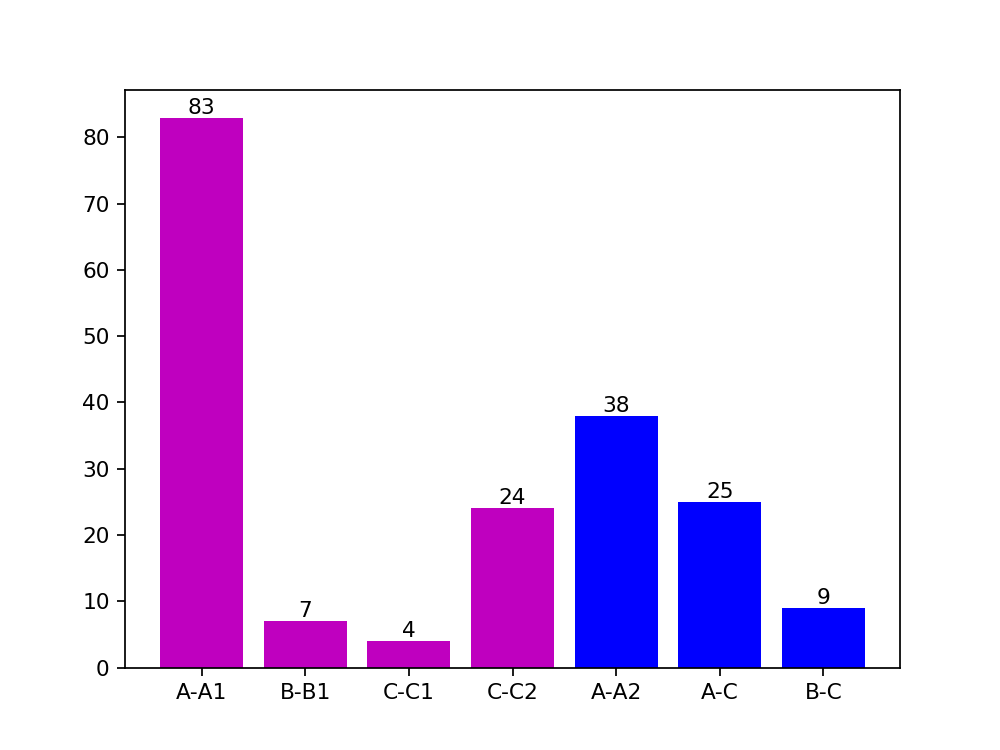

In [71]:
joint_topology_summary = Counter(ortholog_dataset.iloc[matching_topologies, :]['joint_topologies_low_tree'])

conversion_topologies = ['A-A1', 'B-B1', 'C-C1', 'C-C2']
hybrid_topologies = ['A-A2','A-C', 'B-C']

fig, ax = plt.subplots()    
ind_conv = np.arange(len(conversion_topologies))  # the x locations for the groups
x_conv = [joint_topology_summary[topology] for topology in conversion_topologies]
bar_conv = ax.bar(ind_conv, x_conv, color = 'm')

ind_hyb = np.arange(len(hybrid_topologies))+ len(conversion_topologies)  # the x locations for the groups
x_hyb = [joint_topology_summary[topology] for topology in hybrid_topologies]
bar_hyb = ax.bar(ind_hyb, x_hyb, color = 'b')

#I have no idea why I have to add the initial '' to the labels
tick_labels = [''] + conversion_topologies + hybrid_topologies
ax.set_xticklabels(tick_labels)

# Add counts above the two bars
for rect in bar_conv+bar_hyb:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig(os.path.normpath('C:\\Users\heine\Google Drive\\UCSF\ElSamad_Lab\Lab Meeting\\20180209\joint_phylogeny.svg'),format='svg')
# plt.title('title')
# plt.xlabel('x')
# plt.ylabel('y')      


<IPython.core.display.Javascript object>


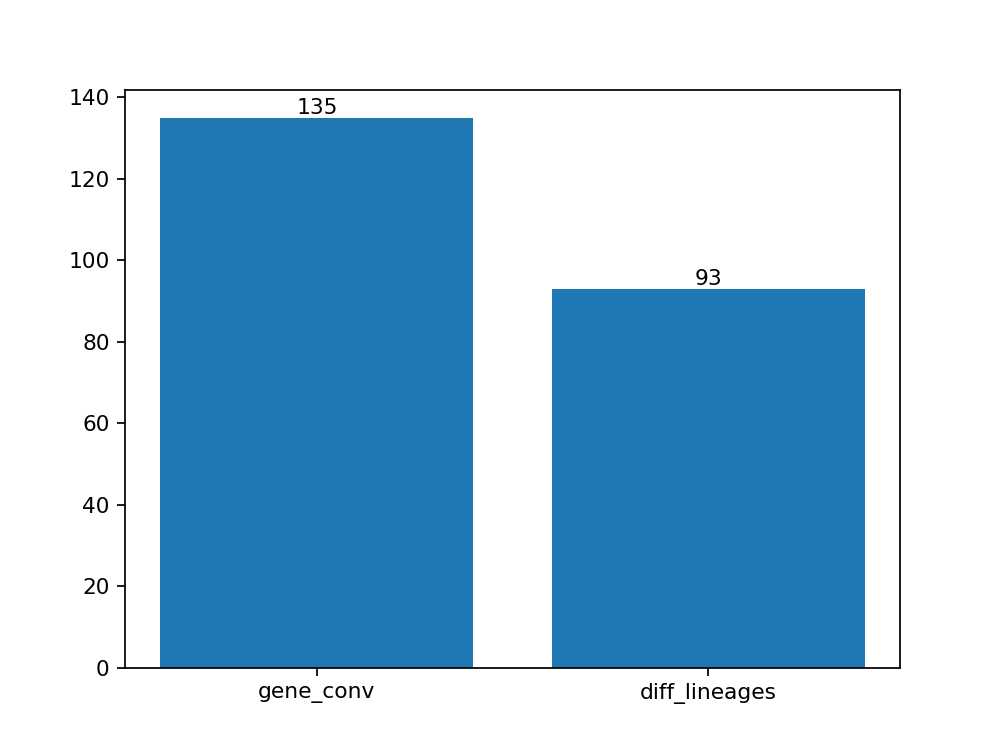

In [88]:
joint_topology_type = [io_library.joint_topology_type(item) for item in ortholog_dataset.iloc[similar_topologies, :]['joint_topologies_low_tree']]
joint_topology_type_summary = Counter(joint_topology_type)

fig, ax = plt.subplots()    
ind = np.arange(len(joint_topology_type_summary.keys()))  # the x locations for the groups
x = joint_topology_type_summary.values()
tick_labels = list(joint_topology_type_summary.keys())
bar = ax.bar(ind, x, tick_label=tick_labels)

ax.set_xticklabels(tick_labels)

# Add counts above the two bars
for rect in bar:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig(os.path.normpath('C:\\Users\heine\Google Drive\\UCSF\ElSamad_Lab\Lab Meeting\\20180209\joint_phylogeny_similar.svg'),format='svg')


## Integrate and visualise joint topology data for GOIs

In [93]:
#Integrate data into goi_data: 

#Add data to input ortholog dataset
paralog_labels = ['low','high']
for tree_label in paralog_labels:
    joint_topologies_tree_label = [joint_topology[tree_label] for joint_topology in joint_topologies]
    ortholog_dataset_goi['joint_topologies_'+tree_label+'_tree'] = joint_topologies_tree_label
    
    for label in paralog_labels: 
        topologies_label_tree_label = []
        for topology in topologies: 
            if isinstance(topology[tree_label],dict):
                topologies_label_tree_label.append(topology[tree_label][label])
            elif isinstance(topology[tree_label],str):
                topologies_label_tree_label.append(topology[tree_label])
        ortholog_dataset_goi['topologies_' + tree_label + '_tree_' + label] = topologies_label_tree_label

#stack new data and change 'low'/'high' combined column to 'sc_genename' for merger
ortholog_dataset_goi_stack = pd.DataFrame(columns = ['sc_genename','joint_topologies_low_tree','joint_topologies_high_tree','topologies_low_tree', 'topologies_high_tree'])
for label in paralog_labels: 
    data_to_stack = ortholog_dataset_goi.loc[:,[label,'joint_topologies_low_tree','joint_topologies_high_tree','topologies_low_tree_' + label, 'topologies_high_tree_' + label]]
    data_to_stack.columns = ['sc_genename','joint_topologies_low_tree','joint_topologies_high_tree','topologies_low_tree', 'topologies_high_tree']
    ortholog_dataset_goi_stack = ortholog_dataset_goi_stack.append(data_to_stack)
    

goi_data_phylogenies = goi_data.merge(ortholog_dataset_goi_stack, how = 'left', on = 'sc_genename')

#add phylomedb_name column
phylomedb_name = io_library.get_phylomedb_name(list(goi_data_phylogenies['sc_genename']))
goi_data_phylogenies['phylomedb_name'] = phylomedb_name

goi_data_phylogenies.to_csv(data_processing_dir + os.sep + "20170817_klscpka" + os.sep + "goi_data_phylogenetic_trees.csv")


No match for YKR028W in phylome namespace
No match for YDR385W in phylome namespace
No match for YFR024C-A in phylome namespace
No match for YBR056W-A in phylome namespace
No match for YOR182C in phylome namespace
No match for YPR080W in phylome namespace


In [102]:
metabolic_gois = goi_data[goi_data['category']=='metabolic']['sc_genename']
ortholog_dataset_goi[ortholog_dataset_goi['low'].isin(metabolic_gois) | ortholog_dataset_goi['high'].isin(metabolic_gois)]

,low,high,joint_topologies_low_tree,topologies_low_tree_low,topologies_low_tree_high,joint_topologies_high_tree,topologies_high_tree_low,topologies_high_tree_high
5,YDR516C,YCL040W,A-A1,A,A,A-A2,A_late,A_early
18,YJL198W,YCR037C,A-A1,A,A,A-A1,A,A
19,YCR034W,YJL196C,C-C2,C_late,C_early,B-C,B,C
50,YOL024W,YFR017C,None,tree_missing_paralog,tree_missing_paralog,None,tree_missing_paralog,tree_missing_paralog
60,YCR005C,YNR001C,C-C1,C,C,C-C2,C_early,C_late
66,YJR048W,YEL039C,C-outgroup-?,C,C-outgroup,C-outgroup-?,C,C-outgroup
67,YJR049C,YEL041W,A-A1,A,A,A-A1,A,A
92,YOR108W,YNL104C,A-A1,A,A,A-A1,A,A
103,YNL065W,YIL120W,pathological,under construction,under construction,pathological,under construction,under construction
107,YNL052W,YIL111W,A-C,A,C,C-C2,C_late,C_early


In [104]:
metabolic_gois = goi_data[goi_data['category']=='metabolic']['sc_genename']
ortholog_dataset_goi_metabolic = ortholog_dataset_goi[ortholog_dataset_goi['low'].isin(metabolic_gois) | ortholog_dataset_goi['high'].isin(metabolic_gois)]

#Topologies that are not pathological for at least one tree
good_topologies_low_tree = [ind for ind,topology in ortholog_dataset_goi_metabolic['joint_topologies_low_tree'].items() if not(topology in {'pathological', None, 'C-outgroup-?'})]
good_topologies_high_tree = [ind for ind,topology in ortholog_dataset_goi_metabolic['joint_topologies_high_tree'].items() if not(topology in {'pathological', None, 'C-outgroup-?'})]
print("I can cacluate joint topologies using the tree for at least one paralog for {} paralog pairs.".format(len(set(good_topologies_low_tree) | set(good_topologies_high_tree))))

#Topologies that are the same for both tree. 
matching_topologies = io_library.consistant_joint_topologies(ortholog_dataset_goi_metabolic, paralog_labels, 'exact')
print("I get matching topologies tree for both paralogs for {} paralog pairs.".format(len(matching_topologies)))

      
##Topologies that are the same flavor for both trees. 
##would be useful to identify whether they are in the same direction - i.e. same one goes to ZT and same to KLE. 
similar_topologies = io_library.consistant_joint_topologies(ortholog_dataset_goi_metabolic, paralog_labels, 'type')
print("I get matching topologies tree for both paralogs for {} paralog pairs.".format(len(similar_topologies)))

#breakdown for that


print("Calculated with KLac, TorDC, SCer, and the three outgroups, C.Alb, Y.Lip and SPombii.")

I can cacluate joint topologies using the tree for at least one paralog for 39 paralog pairs.
I get matching topologies tree for both paralogs for 25 paralog pairs.
I get matching topologies tree for both paralogs for 28 paralog pairs.
Calculated with KLac, TorDC, SCer, and the three outgroups, C.Alb, Y.Lip and SPombii.


In [109]:
matching_topologies

[18,
 67,
 92,
 114,
 189,
 191,
 199,
 213,
 241,
 258,
 259,
 261,
 276,
 280,
 303,
 341,
 357,
 379,
 405,
 424,
 437,
 443,
 470,
 488,
 511]

In [110]:
joint_topology_summary = Counter(ortholog_dataset_goi_metabolic.loc[matching_topologies, :]['joint_topologies_low_tree'])


<IPython.core.display.Javascript object>


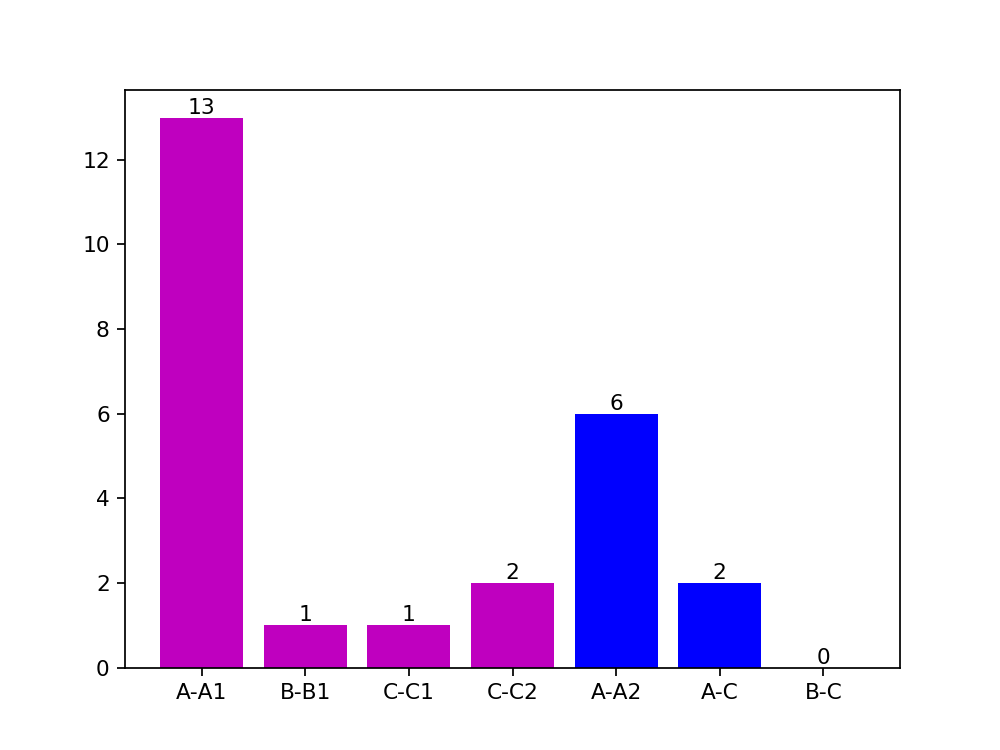

In [111]:
joint_topology_summary = Counter(ortholog_dataset_goi_metabolic.loc[matching_topologies, :]['joint_topologies_low_tree'])

conversion_topologies = ['A-A1', 'B-B1', 'C-C1', 'C-C2']
hybrid_topologies = ['A-A2','A-C', 'B-C']

fig, ax = plt.subplots()    
ind_conv = np.arange(len(conversion_topologies))  # the x locations for the groups
x_conv = [joint_topology_summary[topology] for topology in conversion_topologies]
bar_conv = ax.bar(ind_conv, x_conv, color = 'm')

ind_hyb = np.arange(len(hybrid_topologies))+ len(conversion_topologies)  # the x locations for the groups
x_hyb = [joint_topology_summary[topology] for topology in hybrid_topologies]
bar_hyb = ax.bar(ind_hyb, x_hyb, color = 'b')

#I have no idea why I have to add the initial '' to the labels
tick_labels = [''] + conversion_topologies + hybrid_topologies
ax.set_xticklabels(tick_labels)

# Add counts above the two bars
for rect in bar_conv+bar_hyb:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig(os.path.normpath('C:\\Users\heine\Google Drive\\UCSF\ElSamad_Lab\Lab Meeting\\20180209\joint_phylogeny_goi.svg'),format='svg')
# plt.title('title')
# plt.xlabel('x')
# plt.ylabel('y')   

In [71]:
# #Add topology columns to dataframe

# ortholog_dataset['joint_topologies'] = joint_topologies

# for fc_level in ['low','high']:
#     topologies_fc_level = []
#     for topology in topologies: 
#         topology_fc_level = {}
#         for fc_level_tree in ['low','high']:
#             if isinstance(topology[fc_level_tree],str):
#                 topology_fc_level[fc_level_tree] = None
#             elif isinstance(topology[fc_level_tree],dict):
#                 topology_fc_level[fc_level_tree] = topology[fc_level_tree][fc_level]
#         topologies_fc_level.append(topology_fc_level)
#     ortholog_dataset['topologies_'+ fc_level] = topologies_fc_level


In [72]:
#How many get consistent results from both low and high trees? 

# topologies_gene_conv = {'A-A1','B-B1','C-C1','C-C2'}
# topologies_diff_lineages = {'A-A2','B-B2','A-C','A-B','B-C'}

resolution = 'exact'  #options are 'exact' or 'type'

ind_list = []
for ind,row in ortholog_dataset.iterrows(): 
    joint_topology = row['joint_topologies']
    #Make sure none of the joint topologies are pathological or None
    if len({None, 'pathological'} - {joint_topology['high'],joint_topology['low']})==2:
        #check to see if both joint topologies agree
        if resolution == 'exact':
            if joint_topology['low']==joint_topology['high']:
                ind_list.append(ind)
                #print("{} and {} have matching joint topologies: {} and {} respectively".format(row['SC_common_name_low'],row['SC_common_name_high'],joint_topology['low'],joint_topology['high']))           
        elif resolution == 'type': 
            joint_topology_type = {'low':io_library.joint_topology_type(joint_topology['low']), 
                                   'high': io_library.joint_topology_type(joint_topology['high'])}
            if joint_topology_type['low']==joint_topology_type['high']:
                ind_list.append(ind)
                #print("{} and {} have similar joint topologies: {} and {} respectively".format(row['SC_common_name_low'],row['SC_common_name_high'],joint_topology['low'],joint_topology['high']))


            

columns_to_view = ['SC_common_name_low','SC_common_name_high','log2FoldChange_SC_low', 'log2FoldChange_SC_high', 'log2FoldChange_KL_low','joint_topologies','topologies_low','topologies_high','threshold_group_KL','threshold_group_SC']
ortholog_dataset.loc[ind_list,columns_to_view]


#exactly equal 
#   How many are "gene_conversion" 
#   How many are "different_lineages"

SPS2 and SPS22 have matching joint topologies: C-outgroup-? and C-outgroup-? respectively
EUG1 and PDI1 have matching joint topologies: C-outgroup-? and C-outgroup-? respectively
GNP1 and AGP1 have matching joint topologies: A-A1 and A-A1 respectively
TOS4 and PLM2 have matching joint topologies: A-C and A-C respectively
RPL37A and RPL37B have matching joint topologies: A-A1 and A-A1 respectively
SKG3 and CAF120 have matching joint topologies: B-C and B-C respectively
LAM1 and SIP3 have matching joint topologies: A-A2 and A-A2 respectively
PHO90 and PHO87 have matching joint topologies: A-A1 and A-A1 respectively
RPL17B and RPL17A have matching joint topologies: A-A1 and A-A1 respectively
PIR1 and PIR5 have matching joint topologies: C-outgroup-? and C-outgroup-? respectively
RPS21B and RPS21A have matching joint topologies: A-A1 and A-A1 respectively
CAF4 and MDV1 have matching joint topologies: C-outgroup-? and C-outgroup-? respectively
SET3 and SET4 have matching joint topologies: C

,SC_common_name_low,SC_common_name_high,log2FoldChange_SC_low,log2FoldChange_SC_high,log2FoldChange_KL_low,joint_topologies,topologies_low,topologies_high,threshold_group_KL,threshold_group_SC
3,SPS2,SPS22,-1.076672,2.212668,2.658001,"{'low': 'C-outgroup-?', 'high': 'C-outgroup-?'}","{'low': 'missing TORDC protein', 'high': 'miss...","{'low': 'C-outgroup', 'high': 'C-outgroup'}",up,flat_flat
4,EUG1,PDI1,-0.030605,-0.003622,1.039729,"{'low': 'C-outgroup-?', 'high': 'C-outgroup-?'}","{'low': 'C-outgroup', 'high': 'C-outgroup'}","{'low': 'B', 'high': 'A'}",flat,flat_flat
9,GNP1,AGP1,-2.082446,0.734168,-2.184941,"{'low': 'A-A1', 'high': 'A-A1'}","{'low': 'A', 'high': 'A'}","{'low': 'A', 'high': 'A'}",flat,flat_flat
13,TOS4,PLM2,-1.835652,-0.078397,-0.694645,"{'low': 'A-C', 'high': 'A-C'}","{'low': 'C', 'high': 'C'}","{'low': 'A', 'high': 'A'}",flat,flat_flat
14,RPL37A,RPL37B,-4.388579,-3.184543,-3.285070,"{'low': 'A-A1', 'high': 'A-A1'}","{'low': 'A', 'high': 'A'}","{'low': 'A', 'high': 'A'}",down,down_down
15,SKG3,CAF120,-0.207497,0.287918,0.953702,"{'low': 'B-C', 'high': 'B-C'}","{'low': 'B', 'high': 'B'}","{'low': 'C', 'high': 'C'}",flat,flat_flat
17,LAM1,SIP3,0.440538,0.672026,0.869133,"{'low': 'A-A2', 'high': 'A-A2'}","{'low': 'A_early', 'high': 'A_early'}","{'low': 'A_late', 'high': 'A_late'}",flat,flat_flat
18,PHO90,PHO87,-2.928895,-0.196522,-0.838158,"{'low': 'A-A1', 'high': 'A-A1'}","{'low': 'A', 'high': 'A'}","{'low': 'A', 'high': 'A'}",flat,down_flat
22,RPL17B,RPL17A,-4.669997,-3.896595,-4.740033,"{'low': 'A-A1', 'high': 'A-A1'}","{'low': 'A', 'high': 'A'}","{'low': 'A', 'high': 'A'}",down,down_down
25,PIR1,PIR5,-0.161061,1.420830,-0.545850,"{'low': 'C-outgroup-?', 'high': 'C-outgroup-?'}","{'low': 'missing TORDC protein', 'high': 'miss...","{'low': 'C-outgroup', 'high': 'C-outgroup'}",flat,flat_flat


Looking for exact matches of joint topologies, there are 221 of my entire ortholog set using TORDC and KLULA as seed species that match.  Marcet-Houben and Galbadon had 463 that they kept.

['A-A1 : 83 37.556561% ',  (33.91%) 
 'A-C : 40 18.099548% ', (8.64%)
 'B-C : 13 5.882353% ',  (0.86%) 
 'A-A2 : 38 17.194570% ', (43.63%)
 'C-C2 : 35 15.837104% ', (3.46%)
 'B-B1 : 7 3.167421% ',  (3.89%))
 'C-C1 : 5 2.262443% '] (4.75%)
 B-B2: 0 0%  (0.86%)
 
 I seem to be underestimating A-A2, and overestimating C-C2, B-C, and A-C. 


In [73]:
ortholog_subset = ortholog_dataset.loc[ind_list,:]
joint_topology_summary = Counter([joint_topology['low'] for joint_topology in ortholog_subset['joint_topologies']])
total = len(ortholog_subset)
["{} : {} {:0%} ".format(key, val, val/total) for key, val in joint_topology_summary.items()]



['C-outgroup-? : 57 23.170732% ',
 'A-A1 : 83 33.739837% ',
 'A-C : 25 10.162602% ',
 'B-C : 9 3.658537% ',
 'A-A2 : 37 15.040650% ',
 'C-C2 : 23 9.349593% ',
 'B-B1 : 7 2.845528% ',
 'C-C1 : 5 2.032520% ']

In [44]:
#Visualize with a heatmap

ortholog_dataset_subset = ortholog_dataset[ortholog_dataset['kl_genename_low'].isin(ohnologs_goi['kl_genename_low'])] #ortholog_dataset 

ortholog_dataset_subset = ortholog_dataset_subset.sort_values(by = ['threshold_group_SC','log2FoldChange_KL_low'])

#fold change values
fc_values = ortholog_dataset_subset.loc[:,['log2FoldChange_SC_low', 'log2FoldChange_SC_high', 'log2FoldChange_KL_low']]


#Topology values
WGH_branch_seed = 'YEAST'
KLE_branch_seed = 'KLULA'
ZT_branch_seed = 'TORDC'


joint_topology_values = []
joint_topology_column_labels = []
joint_topology_text = []

#Visualize joint column low and high
value_dict_joint = {'A-B':7,
              'A-A2':8,
              'B-B2':9,
              'A-C': 10,
              'B-C': 11,
              None: -7,
              'pathological': -6,
              'B-B1':0,
              'A-A1':1,
              'C-C1':2,
              'C-C2':3,
              }


for fc_level in ['low','high']:
    joint_topologies_text_fc_level = [joint_topology[fc_level] for ind, joint_topology in ortholog_dataset_subset['joint_topologies'].items()]
    
    joint_topology_text.append(joint_topologies_text_fc_level)
    joint_topology_values.append([value_dict_joint[item] for item in joint_topologies_text_fc_level])
    
    joint_topology_column_labels.append('joint topology ' + fc_level)

value_dict = {'A':13, 
              'A_late': 12, 
              'B_early': 11,
              'B':0,
              'B_late': 1,
              'A_early': 2,
              'C':7,
              'C_early':6,
              'C_late':5,
              'under construction':-5,
              'missing ' + KLE_branch_seed + ' protein':-6.5,
              'missing ' + ZT_branch_seed + ' and ' + KLE_branch_seed +' protein':-6.5,
              'missing ' + ZT_branch_seed + ' protein':-6.5,
               None:-7
                     }

topology_values = []
topology_column_labels = []
topology_text = []
for fc_level in ['low','high']:
    for fc_level_tree in ['low','high']:
        topology_values.append([value_dict[topology[fc_level_tree]] for ind,topology in ortholog_dataset_subset['topologies_'+fc_level].items()])
        topology_text.append([topology[fc_level_tree] for ind,topology in ortholog_dataset_subset['topologies_'+fc_level].items()])
        topology_column_labels.append('topology ' + fc_level + ' (from ' + fc_level_tree + ' tree)')


#Visualize low and high low and high for each base tree



# for fc_group in ['low', 'high']:
#     for topology_column in topology_columns: 
#         print(fc_group + " " + topology_column)
#         KLE_branch_seed = topology_column.split('_')[2]
#         ZT_branch_seed = topology_column.split('_')[3]
#         value_dict = {'A':-5, 'B':5,'C':0,
#                       'under construction':3,
#                       'missing ' + KLE_branch_seed + ' protein':-1,
#                       'missing ' + ZT_branch_seed + ' and ' + KLE_branch_seed +' protein':-2,
#                       'missing ' + ZT_branch_seed + ' protein':-1.5,
#                        np.nan:-2.5
#                      }
#         topology_values.append([value_dict[topology] for topology in ohnologs_topology_sorted[topology_column + '_' + fc_group]])
        
#         topology_column_labels = WGH_branch_seed[0] + KLE_branch_seed[0] + ZT_branch_seed[0] + '_' + fc_group


gene_labels = ortholog_dataset_subset['SC_common_name_low']+ ' / ' + ortholog_dataset_subset['SC_common_name_high']

trace1 = pygo.Heatmap(z = np.array(fc_values),
                   x=['SC low FC', 'SC high FC', 'KL FC'],
                   y= gene_labels
                   )

trace2 = pygo.Heatmap(z = np.array(joint_topology_values).transpose(),
                   text = np.array(joint_topology_text).transpose(),
                   x=joint_topology_column_labels,
                   y= gene_labels, 
                   hoverinfo = 'x+y+text',
                   colorscale = 'Electric',
                   showscale = False)

trace3 = pygo.Heatmap(z = np.array(topology_values).transpose(),
                      text = np.array(topology_text).transpose(),
                   x=topology_column_labels,
                   y= gene_labels,
                   colorscale = 'Blackbody',
                   hoverinfo = 'x+y+text',
                   showscale = False)


fig = pytools.make_subplots(rows=1, cols=3)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

#fig['layout'].update(height=600, width=600, title='i <3 subplots')

# layout = pygo.Layout(
#     yaxis = {'title': 'Low Paralog / High Paralog'}
# )

#fig = pygo.Figure(data=data, layout=layout)
py.iplot(fig, filename='topology_heatmap')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



In [ ]:
#Separate out data that has a clear interpretation

In [25]:
fc_level = 'low'
Counter([topology[fc_level] for ind,topology in ortholog_dataset['topologies_low'].items()])

Counter({'missing KLULA protein': 18,
         'C': 50,
         None: 112,
         'missing TORDC protein': 34,
         'A': 139,
         'under construction': 15,
         'C_early': 29,
         'B': 27,
         'A_early': 31,
         'C_late': 31,
         'B_late': 2,
         'A_late': 28,
         'B_early': 3})

In [45]:
joint_topologies_equal = []
for ind, row in ortholog_dataset.iterrows():
    joint_topologies_equal.append((row['joint_topologies']['low']) == (row['joint_topologies']['high']))

ortholog_dataset_subset = ortholog_dataset[joint_topologies_equal]


In [181]:
common_name = 'MPC2'
tree = Tree(trees_subset[common_name])
gene = phylomedb_names[phylomedb_names['SC_common_name']==common_name]['phylomedb_name'].iloc[0]
# print(tree)

#Extract only leaves that are are _YEAST, _KLULA, ZT_branch seed (i.e. _TORDC, _ZYGRO)
leaf_names = tree.get_leaf_names()
leaf_subset = [name for name in leaf_names if name.split('_')[1] in {"YEAST","KLULA",ZT_branch_seed}]

#Check for 1-2 S.Cer proteins and only 1 each of KL and ST branch
leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
leaf_subset_spec_counter = Counter(leaf_subset_spec)

leaf_subset_spec_counter

for WGH_branch in ['KLULA',ZT_branch_seed]:
    if (leaf_subset_spec_counter[WGH_branch]>1):
        #Throw out extra WGH branch gene if children of common ancestor between it and current gene are in an outgroup.  
        
        #Prune down tree to include spec of interest and outgroups
        leaf_subset_outgroups = [name for name in leaf_names if name.split('_')[1] in set(["YEAST","KLULA",ZT_branch_seed] + outgroups)]
        tree.prune(leaf_subset_outgroups) 
        #print(tree)
        #for each of the branch genes. 
        branch_genes = [leaf for ind,leaf in enumerate(leaf_subset) if leaf_subset_spec[ind]==WGH_branch]
        for branch_gene in branch_genes:
            ancestor = tree.get_common_ancestor([gene,branch_gene])
            ancestor_leaves = ancestor.get_leaf_names()
            ancestor_leaves_spec = [name.split("_")[1] for name in ancestor_leaves]
    
            #if the leaves of the parent node include an outgroup, throw out the gene
            print(ancestor_leaves_spec)
            if len(set(ancestor_leaves_spec) & set(outgroups)) > 0:
                print('Threw out ' + branch_gene + ' because outgroup gene between it and seed')
                leaf_subset.remove(branch_gene)    
                leaf_subset_spec = [name.split("_")[1] for name in leaf_subset]
                leaf_subset_spec_counter = Counter(leaf_subset_spec)
                
            if  (leaf_subset_spec_counter[WGH_branch]==0):
                print('Alert threw out both ' + WGH_branch + ' genes for seed: ' + gene)
    
    
# # #Extract those ones plus outgroups
# # leaf_names = tree.get_leaf_names()
# # 
# # print(tree)
# gene = ZT_genes[0]



#Warn if it throws out both Zygro genes


['YEAST', 'ZYGRO', 'YEAST', 'KLULA']
['DEKBR', 'YEAST', 'KLULA', 'DEKBR', 'YEAST', 'ZYGRO', 'YEAST', 'KLULA', 'CANAL', 'YARLI']
Threw out Phy0008N7U_KLULA because outgroup gene between it and seed


In [30]:
#Add topology columns to ortholog database
topology_columns = [column for column in trees_topology.columns if column.split('_')[0]=='topologies']
#sc_phylomedb_convert_topology = pd.merge(sc_phylomedb_convert, pd.DataFrame(trees[topology_columns]), how = 'left', left_on = 'phylomedb_name', right_index = True)
ohnologs_topology_gene1 = pd.merge(ohnologs_goi, trees_topology, how = 'left', left_on = 'sc_genename_low', right_on = 'sc_genename' )
ohnologs_topology = pd.merge(ohnologs_topology_gene1, trees_topology, how = 'left', left_on = 'sc_genename_high', right_on = 'sc_genename',suffixes = ['_low', '_high'])


In [38]:
#Finds all possible values for topology for a given set of columns. 
list(set(list(ohnologs_topology[topology_columns[1] + '_low'])+list(ohnologs_topology[topology_columns[1] + '_high'])))


[nan,
 'A',
 'B',
 'under construction',
 'missing KLULA protein',
 'missing ZYGRO and KLULA protein',
 'C']

In [200]:
#Plot out summaries for all of these
print(Counter(ohnologs_topology_sorted['topologies_low']))
print(Counter(ohnologs_topology_sorted['topologies_high']))

Counter({'A': 31, 'C': 14, 'B': 4, 'missing KLULA protein': 4, 'missing TORDC and KLULA protein': 4, 'under construction': 3, nan: 1})
Counter({'A': 26, 'C': 22, 'missing KLULA protein': 4, 'B': 2, 'under construction': 2, 'missing TORDC and KLULA protein': 2, nan: 2, 'missing TORDC protein': 1})


In [85]:
#look at tree topology for given sc common name
gois = ['GDH1','GDH3','CDC19','PYK2','MPC2','MPC3']

phylomedb_names = sc_phylomedb_convert[sc_phylomedb_convert['sc_genename'].isin(io_library.SC_orf_lookup_by_name(gois))].copy()

phylomedb_names['SC_common_name'] = io_library.SC_common_name_lookup(phylomedb_names['sc_genename'])

trees_subset = {}
for ind, row in phylomedb_names.iterrows():
    trees_subset[row['SC_common_name']]=trees.loc[row['phylomedb_name'],'tree']






In [2]:
#columns_to_view = ['Gene 1', 'Gene Name 1', 'log2FoldChange_SC_gene1','Gene 2', 'Gene Name 2',  'log2FoldChange_SC_gene2', 'threshold_group_SC','kl_genename_gene1','log2FoldChange_KL_gene1','threshold_group_KL']

In [17]:
ohnologs_topology_subset[ohnologs_topology_subset['Gene Name low'].isin(['CDC19','PYK2','MPC2','MPC3'])]

,threshold_group_SC,threshold_group_KL,kl_genename_gene1,log2FoldChange_KL_gene1,Gene low,Gene Name low,log2FoldChange_SC_low,Gene high,Gene Name high,log2FoldChange_SC_high,phylomedb_name_low,sc_genename_low,topologies_low,phylomedb_name_high,sc_genename_high,topologies_high
261,up_flat,flat,KLLA0A05500g,-1.789380,YHR162W,MPC2,-1.860001,YGR243W,FMP43,3.387496,Phy000CXYH_YEAST,YHR162W,under construction,Phy000CXQ1_YEAST,YGR243W,under construction
383,up_flat,flat,KLLA0F23397g,0.086733,YAL038W,CDC19,-0.908989,YOR347C,PYK2,2.544465,Phy000CVJD_YEAST,YAL038W,C,Phy000D068_YEAST,YOR347C,C


In [34]:
Counter(ohnologs_topology_subset['topologies_high'])

Counter({'under construction': 40, 'C': 17, 'A': 17, 'B': 1, nan: 5})

In [192]:
hover_text = []
for ind, row in ohnologs_topology_subset.iterrows():
    #(row['Gene Name 1'],row['topologies_gene1'],row['Gene Name 2'], row['topologies_gene2'])
    hover_text.append('{}<br>{}<br>{}<br>{}'.format(row['Gene Name 1'],row['topologies_gene1'],row['Gene Name 2'], row['topologies_gene2']))

#titles = {1: 'One S.Cer ortholog ', 2: 'Two S.Cer orthologs '}
#colors = {1: 'grey', 2: 'red'}

trace = pygo.Scatter(
            x= ohnologs_topology_subset['log2FoldChange_SC_gene1'], #[1,2,3,4],
            y= ohnologs_topology_subset['log2FoldChange_SC_gene2'], #[1.1,2,3.5,7],
            mode= 'markers',
            text= hover_text #['a','b','c','d']
            )

layout = pygo.Layout(
    title= 'topology for ohnologs',
    hovermode= 'closest',
    xaxis= {'title':'gene 1 fold change'},
    yaxis= {'title':'gene 2 fold change'}
    )
    
fig= pygo.Figure(data=[trace], layout=layout)


# N = 1000
# random_x = np.random.randn(N)
# random_y = np.random.randn(N)

# # Create a trace
# trace = pygo.Scatter(
#     x = random_x,
#     y = random_y,
#     mode = 'markers',
#     text = random_x
# )

# data = [trace]

# layout = pygo.Layout(
#     title= 'Stats of USA States',
#     hovermode= 'closest'
#     )

# fig= pygo.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
#py.iplot(data, filename='basic-scatter')

#py.iplot(fig, filename='SC_foldchange_topology_overlay')
py.iplot(fig, filename='SC_foldchange_topology_overlay')


# fig_data = {
#   			'x': [1,2,3,4.5],    #list(ohnologs_topology_subset['log2FoldChange_SC_gene1']), 
#         	'y': [2,3,4,5.7],    #list(ohnologs_topology_subset['log2FoldChange_SC_gene2']) 
#             'mode': 'markers'
#             } #, 
#         	'text': hover_text, 
#         	'mode': 'markers', 
#             'marker': {
#                 'opacity': 0.5,
#                 #'color': colors[NN]
#                 }
#             }
        	#'name': } 

# fig = {
#     'data': fig_data
#     'layout': {
#                 'xaxis': {'title': 'Gene 1 fold change'},
#                 'yaxis': {'title': 'Gene 2 fold change'}
#                }
       



